In [2]:
# -- Step 0: Import Libraries --- #
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [3]:
# --- Step 1: Load the Dataset --- #
print("Loading the IMDB dataset...")
file_path = '../datasets/IMDB Dataset.csv'
df = pd.read_csv(file_path)
print("Dataset loaded successfully.")

Loading the IMDB dataset...
Dataset loaded successfully.



--- Data Inspection ---
Shape of the dataset: (50000, 2)

First 5 rows:
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

Distribution of Sentiments:
sentiment
positive    25000
negative    25000
Name: count, dtype: int64


/var/folders/zb/9r9_90xd6q58vdc12982fnp00000gn/T/ipykernel_2017/2509974347.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df, palette='viridis')


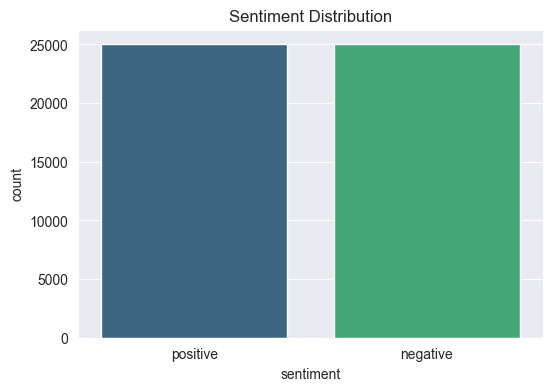

In [4]:
# --- Step 2: Initial Inspection --- #
print("\n--- Data Inspection ---")
print(f"Shape of the dataset: {df.shape}")
print("\nFirst 5 rows:")
print(df.head())

print("\nDistribution of Sentiments:")
print(df['sentiment'].value_counts())

# Visualize the distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='sentiment', data=df, palette='viridis')
plt.title('Sentiment Distribution')
plt.show()

In [5]:
# --- Step 3: Look at Example Reviews --- #
print("\n--- Example Reviews ---")

# Display one positive review
print("\n--- Example of a POSITIVE review ---")
# Using .to_string() ensures the full text is printed without being cut off.
positive_review = df[df['sentiment'] == 'positive']['review'].iloc[0]
print(positive_review)

# Display one negative review
print("\n--- Example of a NEGATIVE review ---")
negative_review = df[df['sentiment'] == 'negative']['review'].iloc[0]
print(negative_review)


--- Example Reviews ---

--- Example of a POSITIVE review ---
One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br />


--- Generating Word Clouds ---


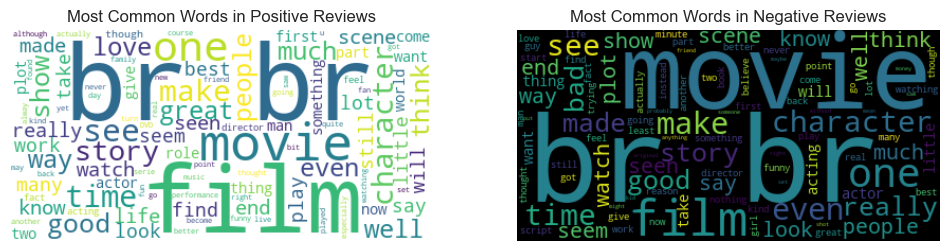

In [6]:
# --- Step 4: Visualize Common Words with Word Clouds --- #
# This is a powerful way to see which words are most frequent in each category.
print("\n--- Generating Word Clouds ---")

positive_text = " ".join(review for review in df[df['sentiment'] == 'positive']['review'])
negative_text = " ".join(review for review in df[df['sentiment'] == 'negative']['review'])

# Create the word cloud for positive reviews
wordcloud_positive = WordCloud(background_color="white", max_words=100).generate(positive_text)

# Create the word cloud for negative reviews
wordcloud_negative = WordCloud(background_color="black", max_words=100).generate(negative_text)

# Display the word clouds
plt.figure(figsize=(12, 6))

# Positive Word Cloud
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Words in Positive Reviews")

# Negative Word Cloud
plt.subplot(1, 2, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Words in Negative Reviews")

plt.show()
